In [1]:
# Download data from google drive
import gdown
!gdown --id 1G_xy9CDKJ9ZV597m-wZvyiFbsSDLi4CE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1G_xy9CDKJ9ZV597m-wZvyiFbsSDLi4CE
To: /content/sub-028_PainUncertainty_2023-06-21_08h34.44.889.csv
100% 78.5k/78.5k [00:00<00:00, 117MB/s]


In [2]:
# Import pandas to load excel table
import pandas as pd
# Import matplotlip to plot
import matplotlib.pyplot as plt
# Import numpy for vector/matrices
import numpy as np
# Import seabonr for nicer plots
import seaborn as sns

# Load data
data = pd.read_csv('/content/sub-028_PainUncertainty_2023-06-21_08h34.44.889.csv')

# Remove rows for practice and pauses between blocs
data = data[~data['block_name'].isna()]
data = data[~data['cue_'].isna()].reset_index(drop=True)

# Show
data

,cue_,stimulus_,cue_fichier,stimulus_fichier,block_name,block_trials_file,block_n_reps,block_ntrials,block_prob_highP_highT,block_prob_highP_lowT,...,participant,low_ma,high_ma,failsafe_ma,block_file,date,expName,psychopyVersion,frameRate,Unnamed: 54
0,grave,forte,stimuli/330Hz,stimuli/forte,bloc_1,prob20hthp_12trials.xlsx,4.0,48.0,20.0,80.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
1,grave,moderee,stimuli/330Hz,stimuli/moderee,bloc_1,prob20hthp_12trials.xlsx,4.0,48.0,20.0,80.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
2,aigu,moderee,stimuli/660Hz,stimuli/moderee,bloc_1,prob20hthp_12trials.xlsx,4.0,48.0,20.0,80.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
3,grave,forte,stimuli/330Hz,stimuli/forte,bloc_1,prob20hthp_12trials.xlsx,4.0,48.0,20.0,80.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
4,aigu,moderee,stimuli/660Hz,stimuli/moderee,bloc_1,prob20hthp_12trials.xlsx,4.0,48.0,20.0,80.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,aigu,moderee,stimuli/660Hz,stimuli/moderee,bloc_9,prob20hthp_12trials.xlsx,3.0,36.0,80.0,20.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
188,aigu,forte,stimuli/660Hz,stimuli/forte,bloc_9,prob20hthp_12trials.xlsx,3.0,36.0,80.0,20.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
189,grave,forte,stimuli/330Hz,stimuli/forte,bloc_9,prob20hthp_12trials.xlsx,3.0,36.0,80.0,20.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN
190,grave,forte,stimuli/330Hz,stimuli/forte,bloc_9,prob20hthp_12trials.xlsx,3.0,36.0,80.0,20.0,...,sub-028,55,110,700,bloc_loop.csv,2023-06-21_08h34.44.889,PainUncertainty,2022.2.5,144.194443,NaN


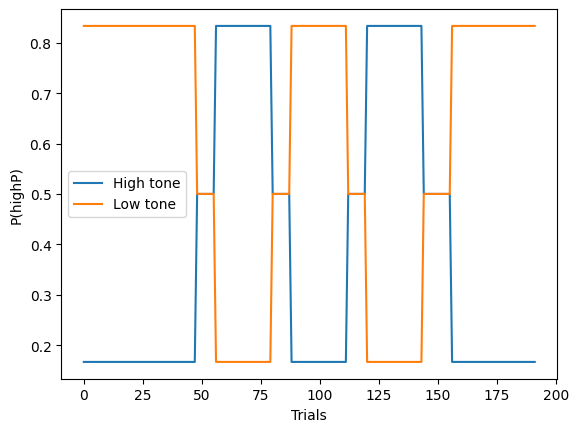

In [3]:
# Plot contingencies
blocks = data['block_name'].unique()

actual_contingencies_hightT = []
actual_contingencies_lowT = []
for b in blocks:
    datab = data[data['block_name'] == b] # Data for this block
    ntrials = list(datab['block_ntrials'])[0] # ntrials for this block
    prob_highp_lowt = len(datab[(datab['stimulus_'] == 'forte') & (datab['cue_'] == 'grave')])/(ntrials/2) # Number of high pain following a low tone divided by 50% of ntrials
    prob_highp_hight = len(datab[(datab['stimulus_'] == 'forte') & (datab['cue_'] == 'aigu')])/(ntrials/2) # Number of high pain following a high tone divided by 50% of ntrials
    actual_contingencies_lowT += [prob_highp_lowt]*int(ntrials)
    actual_contingencies_hightT += [prob_highp_hight]*int(ntrials)


plt.plot(actual_contingencies_hightT, label='High tone')
plt.plot(actual_contingencies_lowT, label='Low tone')
plt.ylabel('P(highP)')
plt.xlabel('Trials')
plt.legend()

In [4]:
# Get accuracy

# Number of times high pain was identified as high
accuracy = len(data[(data['stimulus_'] == 'forte') & (data['choice_pain.keys'] == 'm')])/len(data[(data['stimulus_'] == 'forte')])


data['correct'] = 999
# Assign accuracy to each trial
data.loc[(data['stimulus_'] == 'forte') & (data['choice_pain.keys'] == 'm'), 'correct'] = 1
data.loc[(data['stimulus_'] == 'forte') & (data['choice_pain.keys'] == 'n'), 'correct'] = 0
data.loc[(data['stimulus_'] == 'moderee') & (data['choice_pain.keys'] == 'n'), 'correct'] = 1
data.loc[(data['stimulus_'] == 'moderee') & (data['choice_pain.keys'] == 'm'), 'correct'] = 0
# When no response, incorrect
data.loc[data['choice_pain.keys'] == 'None', 'correct'] = 0


data['accuracy'] = np.sum(data['correct'])/len(data)
print('Accuracy : ' + str(data['accuracy'][0]))


Accuracy : 0.9947916666666666


<ipython-input-5-7a2ef1918174>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stimulus_'] == 'forte']['ratingScale.response'], color='red', label='Forte')
<ipython-input-5-7a2ef1918174>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stimulus_'] == 'moderee']['ratingScal

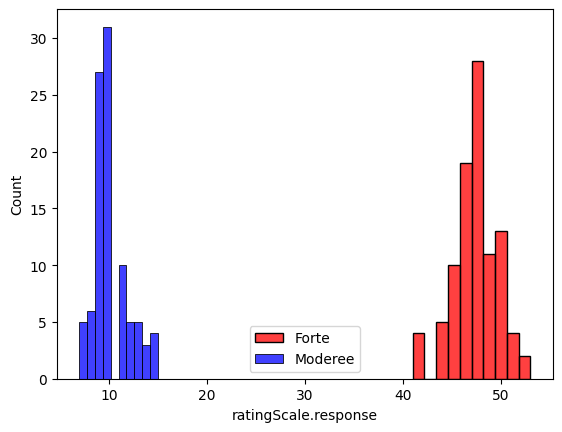

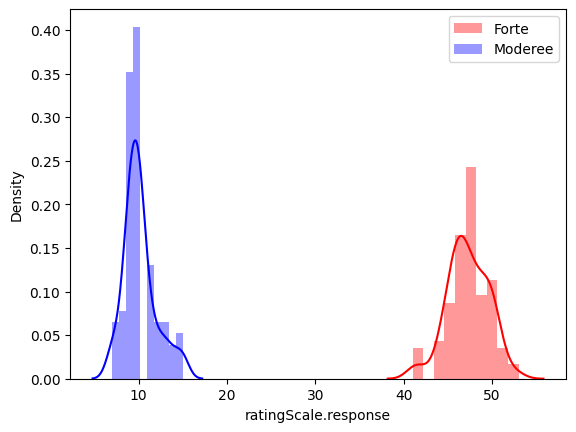

In [5]:
# Plot ratings distribution according to stim
sns.histplot(data[data['stimulus_'] == 'forte']['ratingScale.response'], color='red', label='Forte')
sns.histplot(data[data['stimulus_'] == 'moderee']['ratingScale.response'], color='blue', label='Moderee')
plt.legend()

plt.figure()
sns.distplot(data[data['stimulus_'] == 'forte']['ratingScale.response'], color='red', label='Forte')
sns.distplot(data[data['stimulus_'] == 'moderee']['ratingScale.response'], color='blue', label='Moderee')
plt.legend()

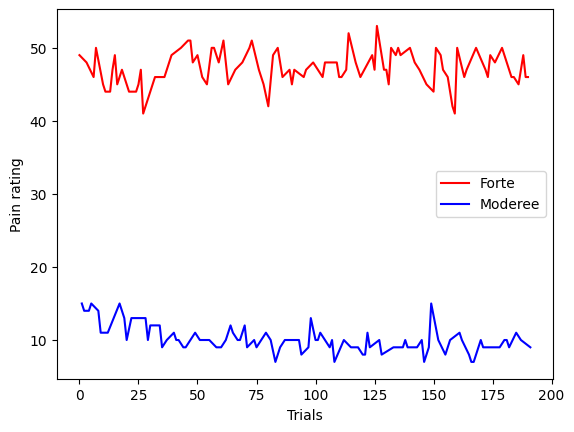

In [6]:
plt.plot(data[data['stimulus_'] == 'forte']['ratingScale.response'], color='red', label='Forte')
plt.plot(data[data['stimulus_'] == 'moderee']['ratingScale.response'], color='blue', label='Moderee')
plt.ylabel('Pain rating')
plt.xlabel('Trials')
plt.legend()

<ipython-input-7-4860ded3bc7b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stimulus_'] == 'forte']['choice_pain.rt'], color='red', label='Forte')
<ipython-input-7-4860ded3bc7b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stimulus_'] == 'moderee']['choice_pain.rt']

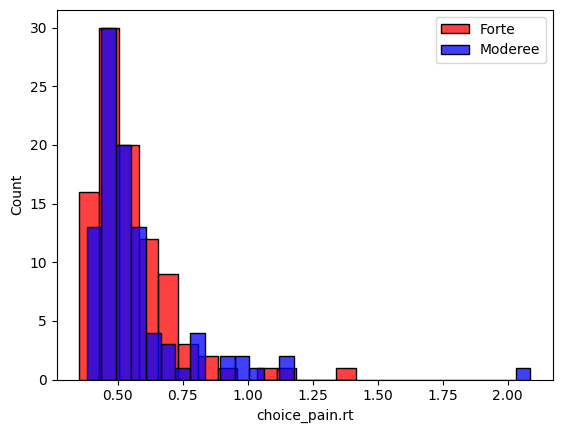

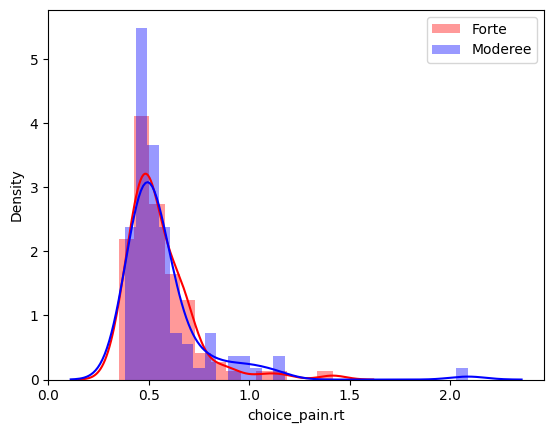

In [7]:
# Plot ratings distribution according to stim
sns.histplot(data[data['stimulus_'] == 'forte']['choice_pain.rt'], color='red', label='Forte')
sns.histplot(data[data['stimulus_'] == 'moderee']['choice_pain.rt'], color='blue', label='Moderee')
plt.legend()

plt.figure()
sns.distplot(data[data['stimulus_'] == 'forte']['choice_pain.rt'], color='red', label='Forte')
sns.distplot(data[data['stimulus_'] == 'moderee']['choice_pain.rt'], color='blue', label='Moderee')
plt.legend()

Text(0.5, 0, 'Trials')

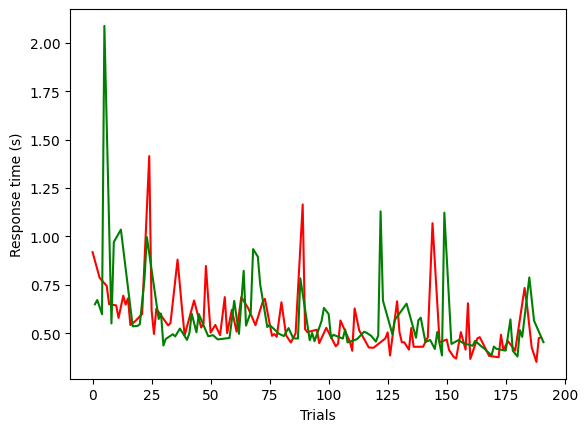

In [8]:
from scipy.stats import zscore
# TODO check why rt > 2 in some cases. Sould be max 2 s.
plt.plot(data[data['stimulus_'] == 'forte']['choice_pain.rt'], color='red', label='Forte')
plt.plot(data[data['stimulus_'] == 'moderee']['choice_pain.rt'], color='green', label='Moderee')
plt.ylabel('Response time (s)')
plt.xlabel('Trials')

<Axes: xlabel='block_name', ylabel='choice_pain.rt'>

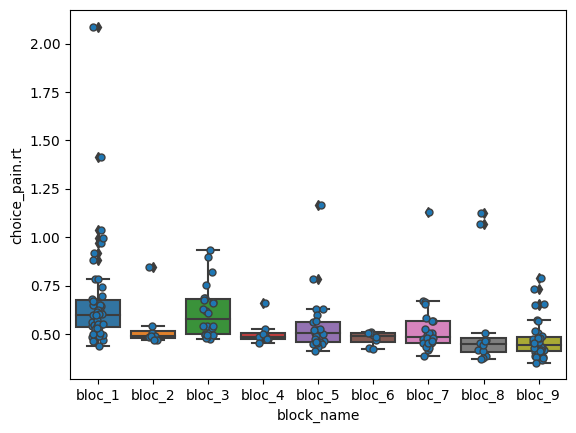

In [9]:
sns.stripplot(data=data, x="block_name", y="choice_pain.rt", linewidth=1)
sns.boxplot(data=data, x="block_name", y="choice_pain.rt")

<Axes: xlabel='block_prob_highP_lowT', ylabel='choice_pain.rt'>

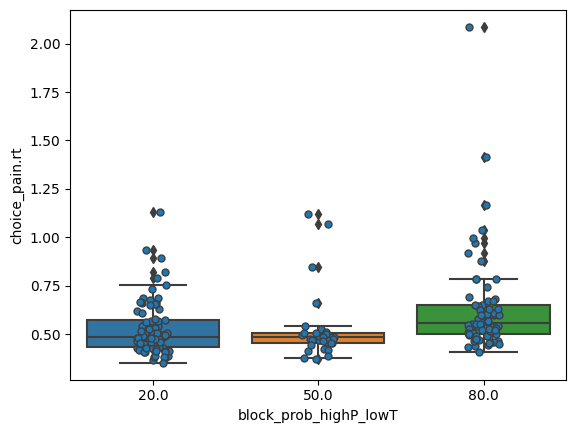

In [10]:
sns.stripplot(data=data, x="block_prob_highP_lowT", y="choice_pain.rt", linewidth=1)
sns.boxplot(data=data, x="block_prob_highP_lowT", y="choice_pain.rt")

In [11]:
# mean pain rating (all trials)
me_all=data['ratingScale.response'].mean()
print(me_all)

28.692708333333332


47.25
10.135416666666666


(0.0, 100.0)

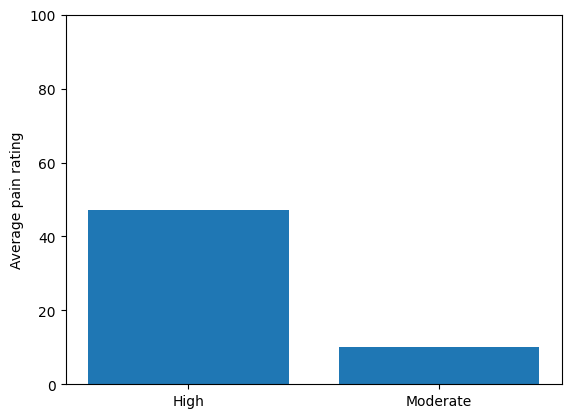

In [12]:
# mean pain rating (moderate vs high intensity)
me_high=data[data['stimulus_'] == 'forte']['ratingScale.response'].mean()
me_mod=data[data['stimulus_'] == 'moderee']['ratingScale.response'].mean()
print(me_high)
print(me_mod)

pain_intensities=["High", "Moderate"]
pain_intensities_means=[(me_high),(me_mod)]
plt.bar(pain_intensities,pain_intensities_means)
plt.ylabel('Average pain rating')
plt.ylim(0,100)

<Axes: xlabel='block_name', ylabel='ratingScale.response'>

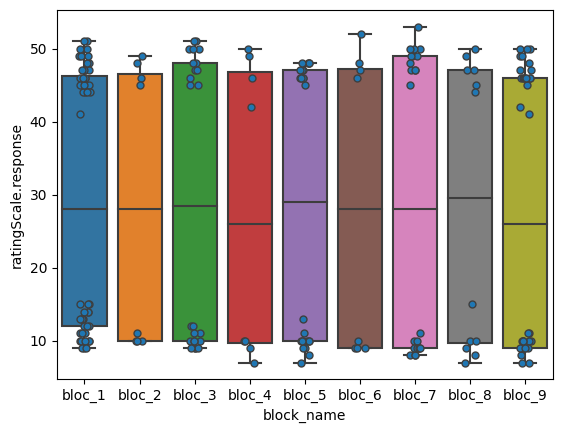

In [13]:
# pain rating (block by block)
sns.stripplot(data=data, x="block_name", y="ratingScale.response", linewidth=1)
sns.boxplot(data=data, x="block_name", y="ratingScale.response")

<Axes: xlabel='block_trials_file', ylabel='ratingScale.response'>

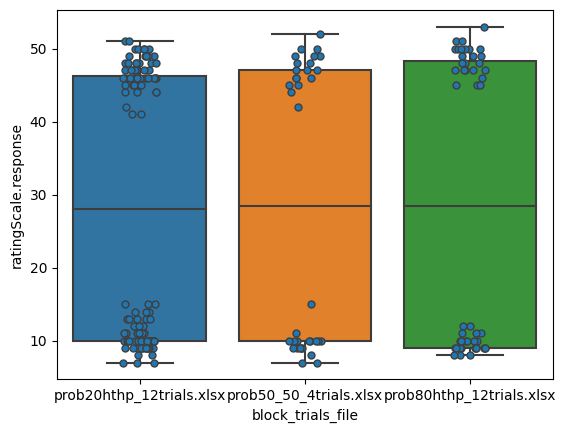

In [14]:
# pain rating (selon contigencies)
sns.stripplot(data=data, x="block_trials_file", y="ratingScale.response", linewidth=1)
sns.boxplot(data=data, x="block_trials_file", y="ratingScale.response")

In [15]:
from numpy.ma.core import mean
# expected rt per block
# BLOC1
bloc1_E_mean_rt=data[data['block_name'] == 'bloc_1'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc1_E_mean_rt)

# BLOC3
bloc3_E_mean_rt=data[data['block_name'] == 'bloc_3'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc3_E_mean_rt)

# BLOC5
bloc5_E_mean_rt=data[data['block_name'] == 'bloc_5'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc5_E_mean_rt)

# BLOC7
bloc7_E_mean_rt=data[data['block_name'] == 'bloc_7'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc7_E_mean_rt)

# BLOC9
bloc9_E_mean_rt=data[data['block_name'] == 'bloc_9'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc9_E_mean_rt)

0.6831659749999062
0.58062529000008
0.565881790000003
0.4723180500000126
0.48703764666664334


<ipython-input-15-e6cad1604185>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc1_E_mean_rt=data[data['block_name'] == 'bloc_1'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-15-e6cad1604185>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc3_E_mean_rt=data[data['block_name'] == 'bloc_3'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-15-e6cad1604185>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc5_E_mean_rt=data[data['block_name'] == 'bloc_5'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-15-e6cad1604185>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc7_E_mean_rt=data[data['block_name'] == 'bloc_7'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-1

In [16]:
from numpy.ma.core import mean
# average rt of E stimuli (all trials; uneven blocks)
me_E_all=(bloc1_E_mean_rt,bloc3_E_mean_rt,bloc5_E_mean_rt,bloc7_E_mean_rt,bloc9_E_mean_rt)
mean_Ex = mean(me_E_all)
print(mean_Ex)

0.557805750333329


In [17]:
# unexpected rt per block
# BLOC1
bloc1_UE_mean_rt=data[data['block_name'] == 'bloc_1'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc1_UE_mean_rt)

# BLOC3
bloc3_UE_mean_rt=data[data['block_name'] == 'bloc_3'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc3_UE_mean_rt)

# BLOC5
bloc5_UE_mean_rt=data[data['block_name'] == 'bloc_5'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc5_UE_mean_rt)

# BLOC7
bloc7_UE_mean_rt=data[data['block_name'] == 'bloc_7'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc7_UE_mean_rt)

# BLOC9
bloc9_UE_mean_rt=data[data['block_name'] == 'bloc_9'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
print(bloc9_UE_mean_rt)

0.5913144249999505
0.5840947999995478
0.4837721500002772
0.5001076000003195
0.4134516333335038


<ipython-input-17-b2a9c739d6b3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc1_UE_mean_rt=data[data['block_name'] == 'bloc_1'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-17-b2a9c739d6b3>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc3_UE_mean_rt=data[data['block_name'] == 'bloc_3'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-17-b2a9c739d6b3>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc5_UE_mean_rt=data[data['block_name'] == 'bloc_5'][data['cue_'] == 'aigu'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-input-17-b2a9c739d6b3>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bloc7_UE_mean_rt=data[data['block_name'] == 'bloc_7'][data['cue_'] == 'grave'][data['stimulus_'] == 'forte']['choice_pain.rt'].mean()
<ipython-inp

In [18]:
from numpy.ma.core import mean
# average rt of UE stimuli (all trials; uneven blocks)
me_UE_all=(bloc1_UE_mean_rt,bloc3_UE_mean_rt,bloc5_UE_mean_rt,bloc7_UE_mean_rt,bloc9_UE_mean_rt)
mean_Un = mean(me_UE_all)
print(mean_Un)

0.5145481216667197


In [19]:
# neutral rt per block
# BLOC2
bloc2_N_mean_rt=data[data['block_name'] == 'bloc_2']['choice_pain.rt'].mean()
print(bloc2_N_mean_rt)

# BLOC4
bloc4_N_mean_rt=data[data['block_name'] == 'bloc_4']['choice_pain.rt'].mean()
print(bloc4_N_mean_rt)

# BLOC6
bloc6_N_mean_rt=data[data['block_name'] == 'bloc_6']['choice_pain.rt'].mean()
print(bloc6_N_mean_rt)

# BLOC8
bloc8_N_mean_rt=data[data['block_name'] == 'bloc_8']['choice_pain.rt'].mean()
print(bloc8_N_mean_rt)

0.5372510499998953
0.5073489750000135
0.47792543749972083
0.540941091666582


In [20]:
from numpy.ma.core import mean
# average rt of N stimuli (all trials; uneven blocks)
me_N_all=(bloc2_N_mean_rt,bloc4_N_mean_rt,bloc6_N_mean_rt,bloc8_N_mean_rt)
mean_Ne = mean(me_N_all)
print(mean_Ne)

0.5158666385415529


(0.0, 2.0)

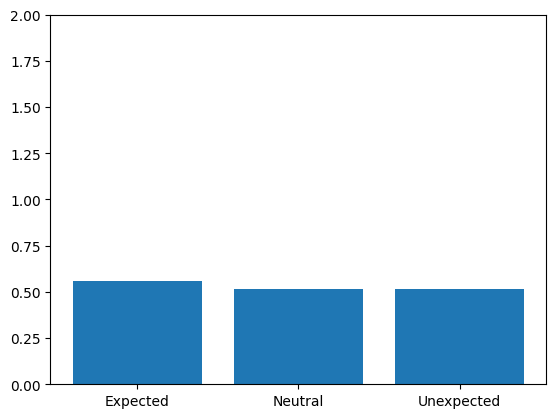

In [21]:
# plotting E vs UE trials rt (bar)
x=["Expected","Neutral","Unexpected"]
expectedness_rt_means=[mean_Ex,mean_Un,mean_Ne]
plt.bar(x,expectedness_rt_means)
plt.ylim(0,2)

In [22]:
#Assign expectedness to each trial
#expected
data.loc[(data['block_name'] == 'bloc_1') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'forte'),'expectedness'] = 'expected'
data.loc[(data['block_name'] == 'bloc_3') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'forte'),'expectedness'] = 'expected'
data.loc[(data['block_name'] == 'bloc_5') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'forte'),'expectedness'] = 'expected'
data.loc[(data['block_name'] == 'bloc_7') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'forte'),'expectedness'] = 'expected'
data.loc[(data['block_name'] == 'bloc_9') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'forte'),'expectedness'] = 'expected'

#neutral
data.loc[(data['block_name'] == 'bloc_2'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_4'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_6'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_8'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_1') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_3') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_5') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_7') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_9') & (data['cue_'] == 'grave') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_1') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_3') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_5') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_7') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'
data.loc[(data['block_name'] == 'bloc_9') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'moderee'),'expectedness'] = 'neutral'

#unexpected
data.loc[(data['block_name'] == 'bloc_1') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'forte'),'expectedness'] = 'unexpected'
data.loc[(data['block_name'] == 'bloc_3') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'forte'),'expectedness'] = 'unexpected'
data.loc[(data['block_name'] == 'bloc_5') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'forte'),'expectedness'] = 'unexpected'
data.loc[(data['block_name'] == 'bloc_7') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'forte'),'expectedness'] = 'unexpected'
data.loc[(data['block_name'] == 'bloc_9') & (data['cue_'] == 'aigu') & (data['stimulus_'] == 'forte'),'expectedness'] = 'unexpected'

In [23]:
print((data['expectedness']))

0        expected
1         neutral
2         neutral
3        expected
4         neutral
          ...    
187       neutral
188    unexpected
189      expected
190      expected
191       neutral
Name: expectedness, Length: 192, dtype: object


In [24]:
from numpy.ma.core import mean
# expected trials mean rt
((data['choice_pain.rt'][data['expectedness']== "expected"]))
print(mean((data['choice_pain.rt'][data['expectedness']== "expected"])))

# neutral trials mean rt
((data['choice_pain.rt'][data['expectedness']== "neutral"]))
print(mean((data['choice_pain.rt'][data['expectedness']== "neutral"])))

# unexpected trials mean rt
(mean((data['choice_pain.rt'][data['expectedness']== "unexpected"])))
print(mean((data['choice_pain.rt'][data['expectedness']== "unexpected"])))

0.5876756510203579
0.565678448245535
0.5207789758621308
